# IIVP - Project 1
### 6252320 - Leon Debnath

Import the required modules for the notebook

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [7]:
def display(images, labels, axis='off', cmap=None):
    
    if len(images) != len(labels):
        raise Exception("images and labels don't correspond")
        
    fig = plt.figure(figsize=(15,10))
    cols = 2
    rows = math.ceil(len(images)/2)
    
    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(labels[i])
        plt.axis(axis)

## Exercise 1

## Exercise 2

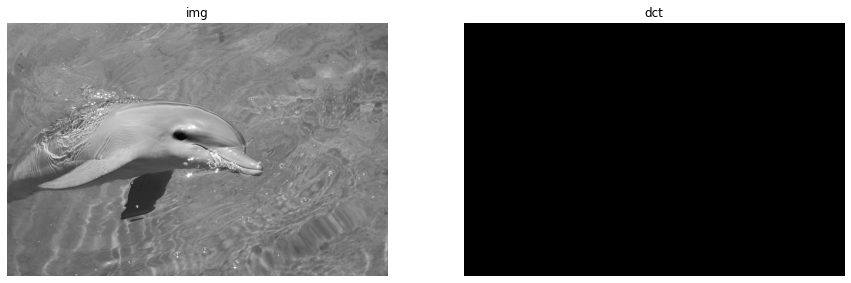

In [37]:
from scipy import fft

img = cv2.cvtColor(cv2.imread('images/dolphin.jpg'), cv2.COLOR_BGR2GRAY)

x = np.fft.fft2(img)
x = abs(x)/255

display([img, x],['img', 'dct'], cmap='gray')

